# Illustration of the feedforward neural network's performance for a regression task using the example of approximating two- and three-dimensional functions on a given interval

In [1]:
import time

import matplotlib.pyplot as plt
import torch

from vladk_neural_network.model.activation import Linear, Relu
from vladk_neural_network.model.base import NeuralNetwork
from vladk_neural_network.model.layer import FullyConnected, Input
from vladk_neural_network.model.loss import MeanSquaredError
from vladk_neural_network.model.metric import R2Score
from vladk_neural_network.model.optimizer import SGD, Adam

## Functions (2d and 3d) whose values we will predict using a neural network

In [2]:
def func_quad(arg):
    return 0.5 * arg**2 + 2 * arg - 1

def func_linear(arg):
    return -1.0 * arg - 1

def func_quad_3d(arg_x, arg_y):
    return 0.2 * arg_x**2 + 0.2 * arg_y**2

def func_sin_plus_cos_3d(arg_x, arg_y):
    return torch.sin(arg_x) + torch.cos(arg_y)

## Helper functions for plotting graphs of functions and displaying changes in loss and R2 score with the change of epochs

In [3]:
def plot_func(x, y, title):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [4]:
def plot_func_3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, cmap="viridis")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [5]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [6]:
def plot_r2_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

## Functions for generating train/test data

In [7]:
def generate_train_test_data(func):

    x = torch.linspace(-5, 5, 100)

    train_data = []

    for x_i in x:
        train_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    x = torch.linspace(-5, 5, 30)

    test_data = []

    for x_i in x:
        test_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    return train_data, test_data

In [8]:
def generate_train_test_data_3d(func_3d):

    x = torch.linspace(-5, 5, 50)
    y = torch.linspace(-5, 5, 50)
    x, y = torch.meshgrid(x, y, indexing="ij")

    train_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            train_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    x = torch.linspace(-5, 5, 30)
    y = torch.linspace(-5, 5, 30)
    x, y = torch.meshgrid(x, y, indexing="ij")

    test_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            test_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    return train_data, test_data

## Creating model for predicting values of the linear function "y = −x − 1" and ploting graphs and changes for loss and r2 score

In [9]:
train_dataset, test_dataset = generate_train_test_data(func_linear)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=SGD(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 20

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/20, train loss: 2.6951, train R2 score: 0.366, test loss: 0.0038, test R2 score: 0.9992, epoch time: 0.055s
Epoch: 2/20, train loss: 0.0111, train R2 score: 0.9974, test loss: 0.0021, test R2 score: 0.9995, epoch time: 0.039s
Epoch: 3/20, train loss: 0.0039, train R2 score: 0.9991, test loss: 0.0023, test R2 score: 0.9995, epoch time: 0.031s
Epoch: 4/20, train loss: 0.0019, train R2 score: 0.9996, test loss: 0.0006, test R2 score: 0.9999, epoch time: 0.03s
Epoch: 5/20, train loss: 0.0007, train R2 score: 0.9998, test loss: 0.0047, test R2 score: 0.9989, epoch time: 0.03s
Epoch: 6/20, train loss: 0.0008, train R2 score: 0.9998, test loss: 0.0003, test R2 score: 0.9999, epoch time: 0.034s
Epoch: 7/20, train loss: 0.0005, train R2 score: 0.9999, test loss: 0.0006, test R2 score: 0.9999, epoch time: 0.031s
Epoch: 8/20, train loss: 0.0005, train R2 score: 0.9999, test loss: 0.0003, test R2 score: 0.9999, epoch time: 0.032s
Epoch: 9/20, train loss: 0.0004, train R2 score: 0.9999, te

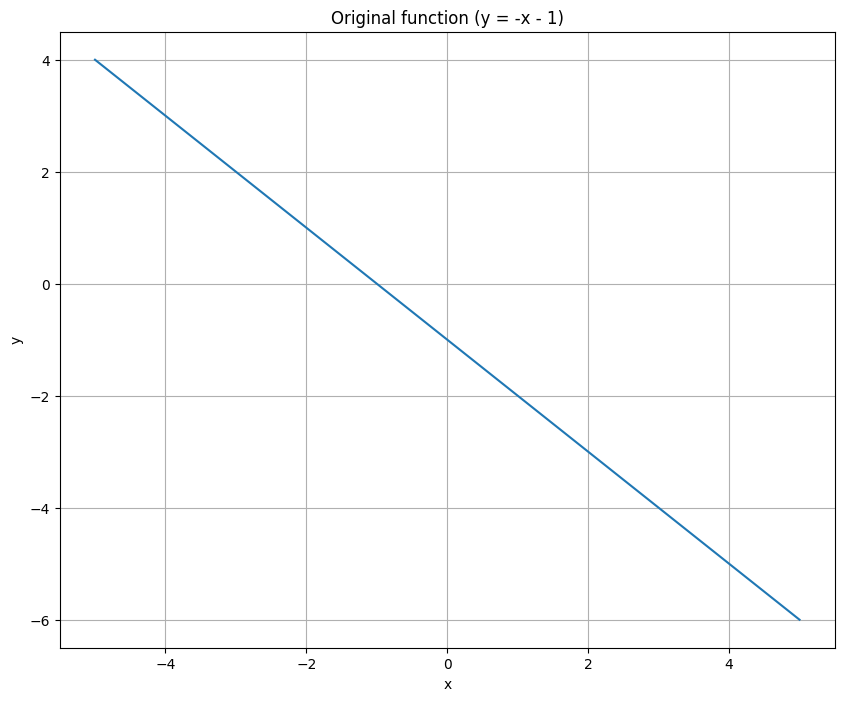

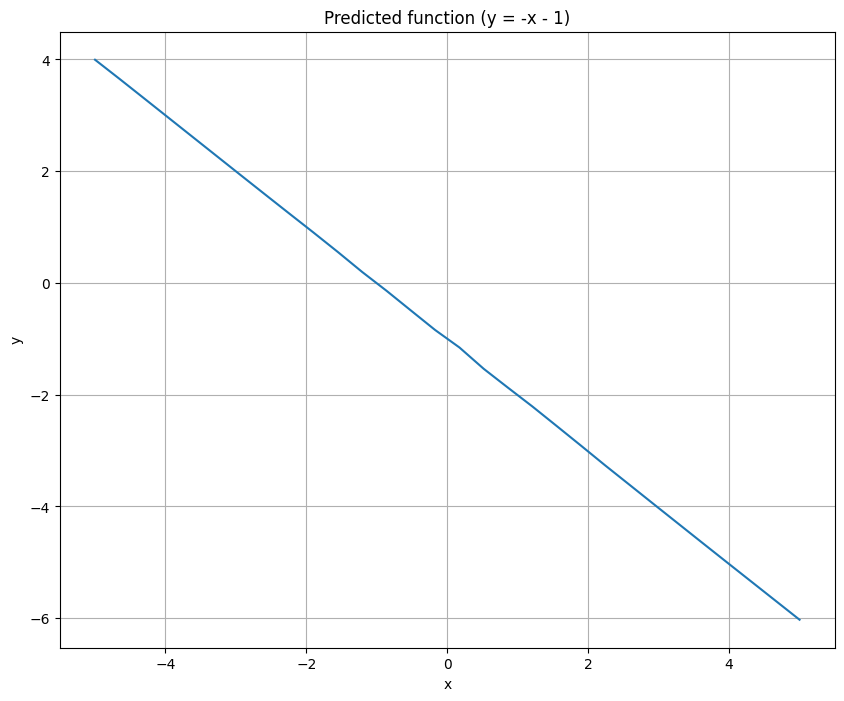

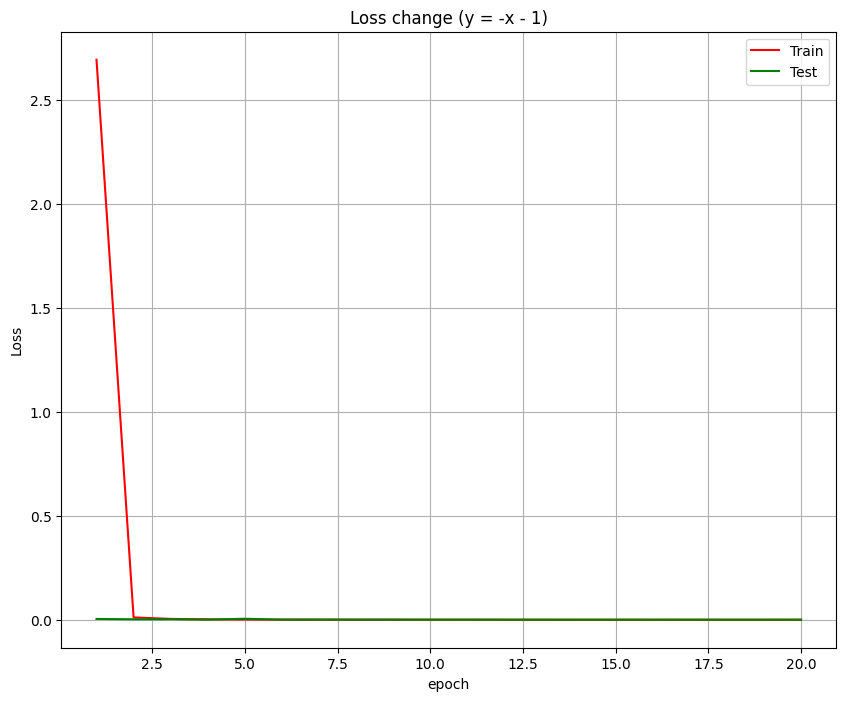

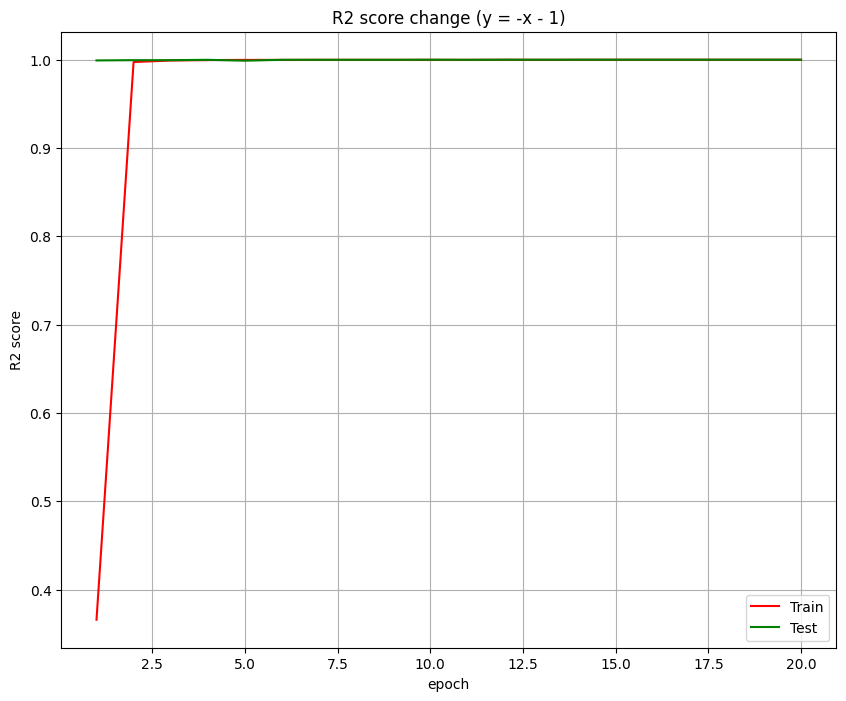

In [10]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = -x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = -x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = -x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = -x - 1)')

## Creating model for predicting values of the quadratic function "y = 0.5 * x**2 + 2 * x - 1" and ploting graphs and changes for loss and r2 score

In [11]:
train_dataset, test_dataset = generate_train_test_data(func_quad)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=Adam(learning_rate=0.0005),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 30

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/30, train loss: 6.4048, train R2 score: 0.7357, test loss: 1.934, test R2 score: 0.9248, epoch time: 0.094s
Epoch: 2/30, train loss: 2.3249, train R2 score: 0.904, test loss: 0.7979, test R2 score: 0.969, epoch time: 0.094s
Epoch: 3/30, train loss: 1.0907, train R2 score: 0.955, test loss: 0.6664, test R2 score: 0.9741, epoch time: 0.092s
Epoch: 4/30, train loss: 0.5883, train R2 score: 0.9757, test loss: 0.6504, test R2 score: 0.9747, epoch time: 0.091s
Epoch: 5/30, train loss: 0.4972, train R2 score: 0.9795, test loss: 0.6635, test R2 score: 0.9742, epoch time: 0.092s
Epoch: 6/30, train loss: 0.3867, train R2 score: 0.984, test loss: 1.0158, test R2 score: 0.9605, epoch time: 0.09s
Epoch: 7/30, train loss: 0.5457, train R2 score: 0.9775, test loss: 0.4209, test R2 score: 0.9836, epoch time: 0.091s
Epoch: 8/30, train loss: 0.335, train R2 score: 0.9862, test loss: 0.1907, test R2 score: 0.9926, epoch time: 0.091s
Epoch: 9/30, train loss: 0.1932, train R2 score: 0.992, test lo

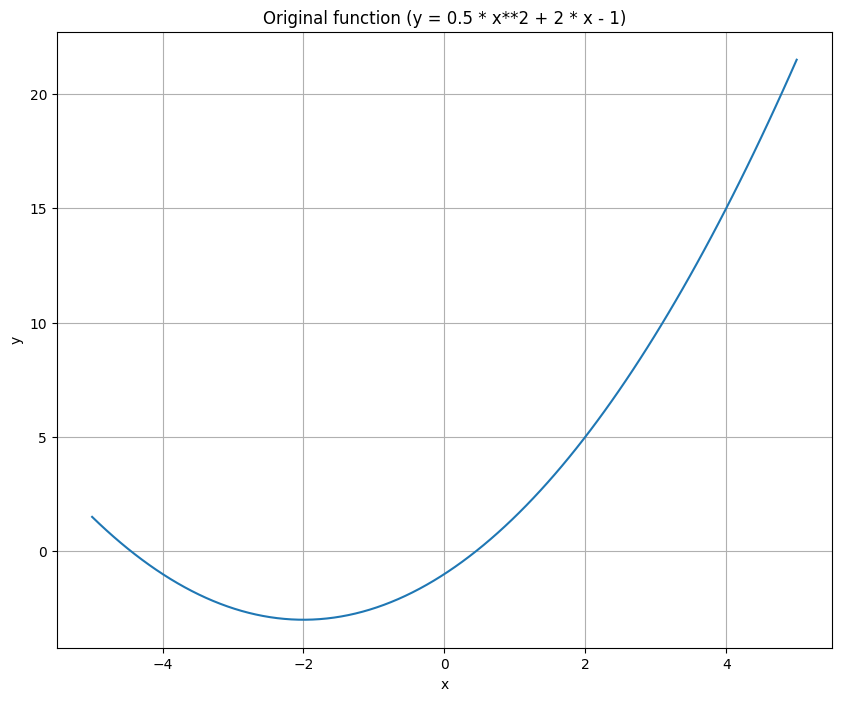

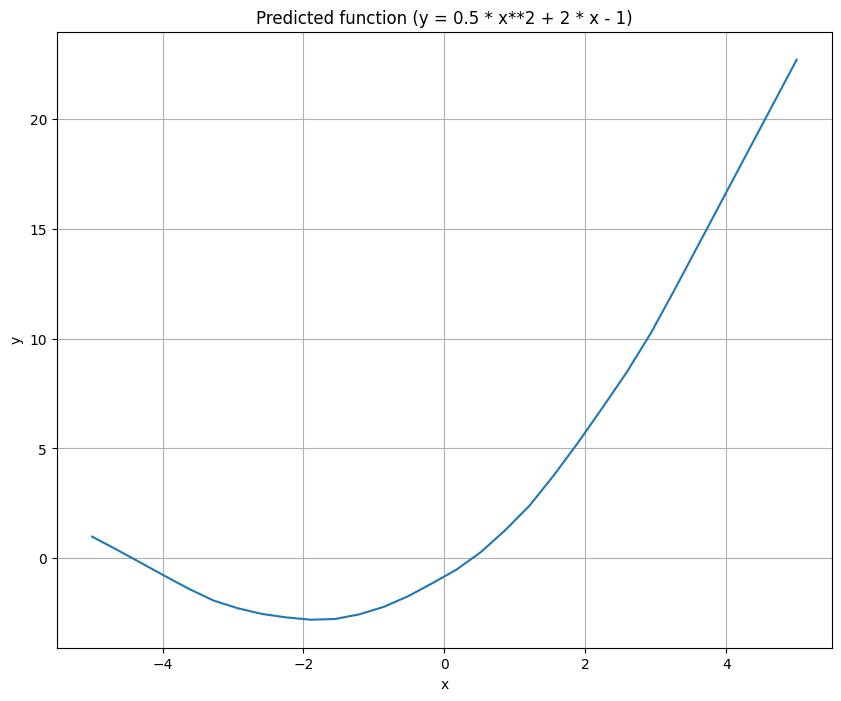

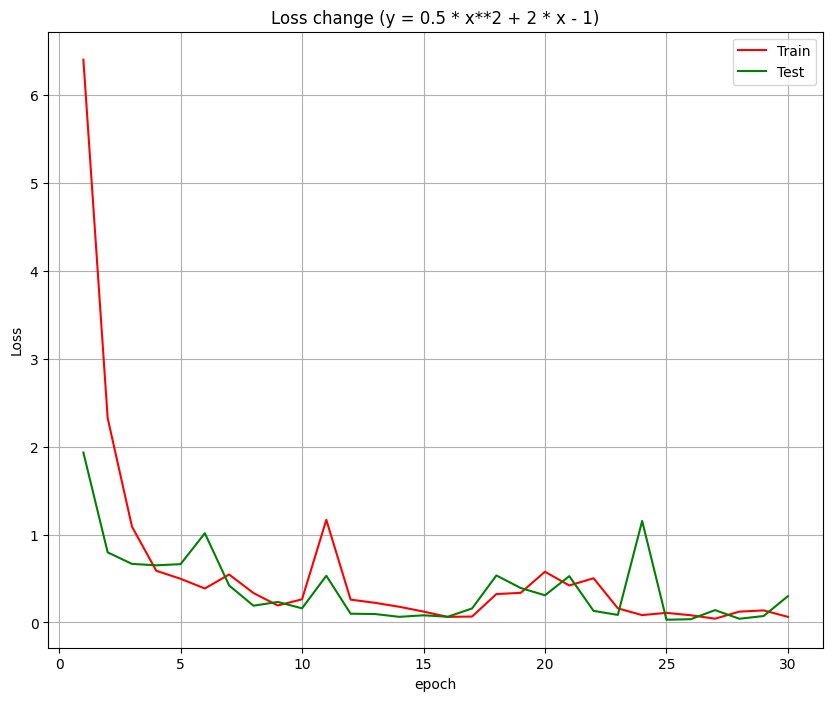

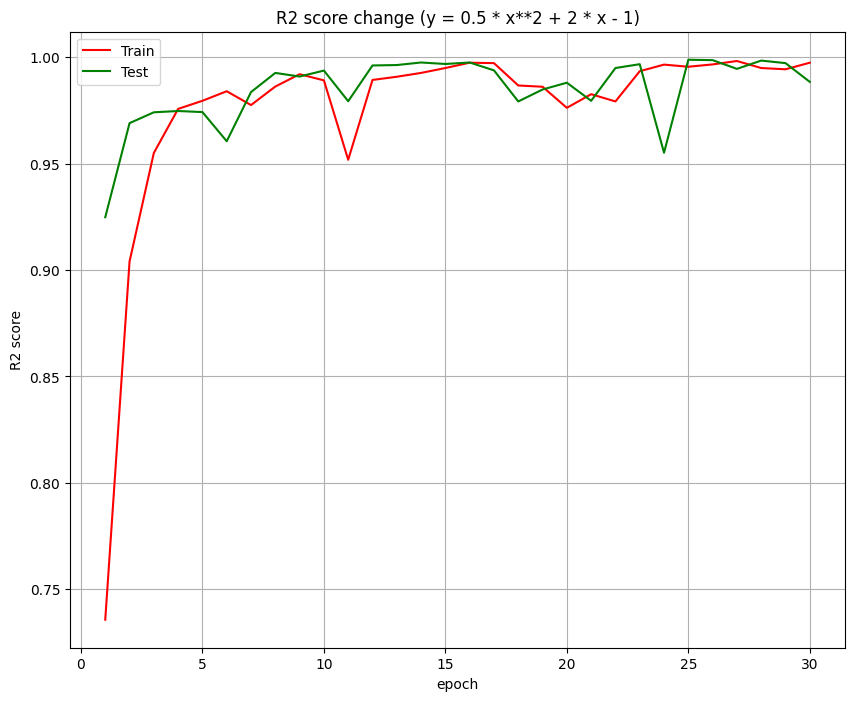

In [12]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = 0.5 * x**2 + 2 * x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = 0.5 * x**2 + 2 * x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = 0.5 * x**2 + 2 * x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = 0.5 * x**2 + 2 * x - 1)')

# Creating model for predicting values of the 3d quadratic function "z = 0.2 * x**2 + 0.2 * y**2" and ploting graphs and changes for loss and r2 score

In [13]:
train_dataset, test_dataset = generate_train_test_data_3d(func_quad_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 1.3014, train R2 score: 0.4587, test loss: 0.1281, test R2 score: 0.9494, epoch time: 1.446s
Epoch: 2/10, train loss: 0.118, train R2 score: 0.9509, test loss: 0.0647, test R2 score: 0.9744, epoch time: 1.331s
Epoch: 3/10, train loss: 0.0483, train R2 score: 0.9799, test loss: 0.0708, test R2 score: 0.972, epoch time: 1.264s
Epoch: 4/10, train loss: 0.0265, train R2 score: 0.989, test loss: 0.045, test R2 score: 0.9822, epoch time: 1.261s
Epoch: 5/10, train loss: 0.0409, train R2 score: 0.983, test loss: 0.0432, test R2 score: 0.9829, epoch time: 1.286s
Epoch: 6/10, train loss: 0.0289, train R2 score: 0.988, test loss: 0.0498, test R2 score: 0.9803, epoch time: 1.273s
Epoch: 7/10, train loss: 0.0214, train R2 score: 0.9911, test loss: 0.0134, test R2 score: 0.9947, epoch time: 1.266s
Epoch: 8/10, train loss: 0.0322, train R2 score: 0.9866, test loss: 0.0312, test R2 score: 0.9877, epoch time: 1.264s
Epoch: 9/10, train loss: 0.0216, train R2 score: 0.991, test l

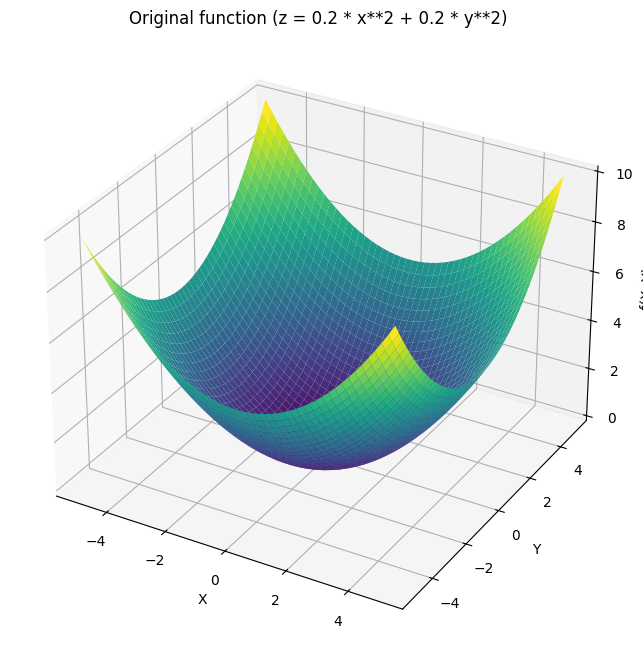

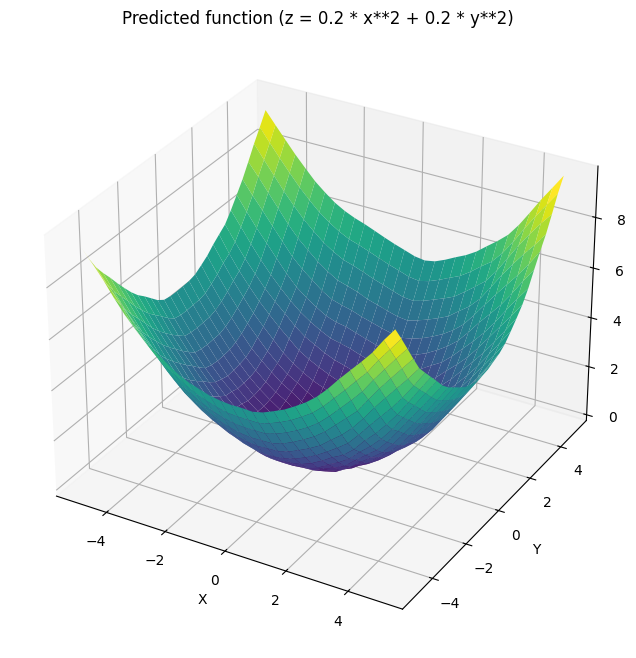

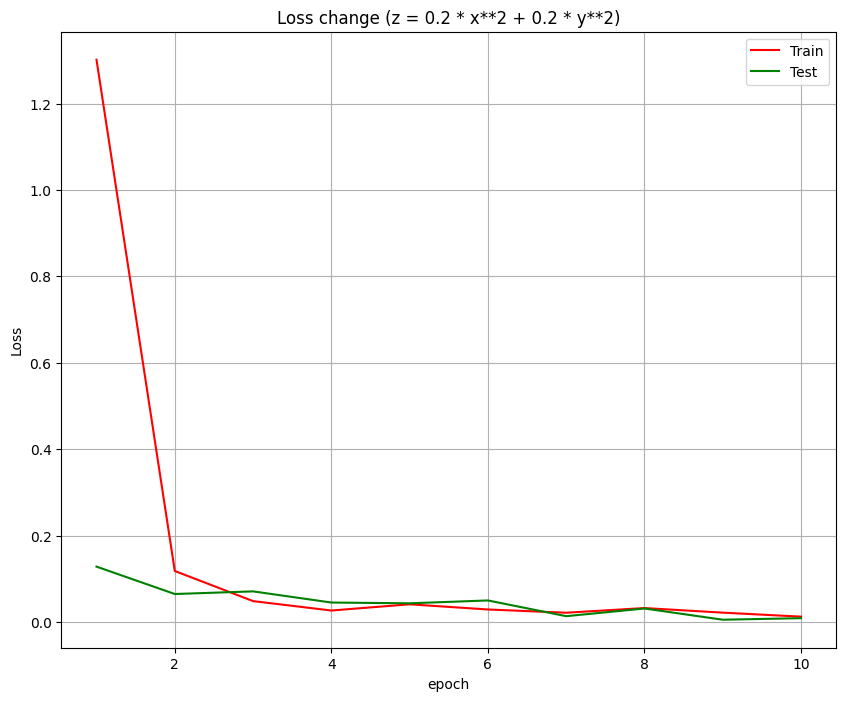

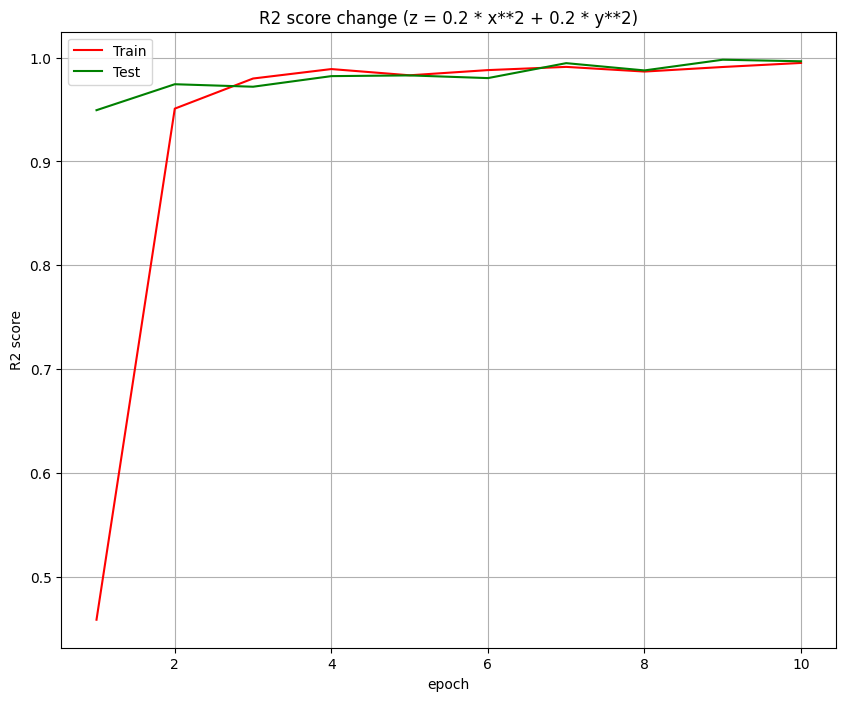

In [14]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = 0.2 * x**2 + 0.2 * y**2)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = 0.2 * x**2 + 0.2 * y**2)')

## Creating model for predicting values of the 3d function "z = sin(x) + cos(y)" and ploting graphs and changes for loss and r2 score

In [15]:
train_dataset, test_dataset = generate_train_test_data_3d(func_sin_plus_cos_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 1.7264, train R2 score: -2.5707, test loss: 0.2798, test R2 score: 0.423, epoch time: 1.287s
Epoch: 2/10, train loss: 0.1632, train R2 score: 0.6624, test loss: 0.084, test R2 score: 0.8268, epoch time: 1.279s
Epoch: 3/10, train loss: 0.0672, train R2 score: 0.8611, test loss: 0.0867, test R2 score: 0.8211, epoch time: 1.276s
Epoch: 4/10, train loss: 0.0444, train R2 score: 0.9082, test loss: 0.0535, test R2 score: 0.8896, epoch time: 1.353s
Epoch: 5/10, train loss: 0.0315, train R2 score: 0.9349, test loss: 0.0307, test R2 score: 0.9367, epoch time: 1.322s
Epoch: 6/10, train loss: 0.0263, train R2 score: 0.9455, test loss: 0.017, test R2 score: 0.9649, epoch time: 1.313s
Epoch: 7/10, train loss: 0.0174, train R2 score: 0.964, test loss: 0.0293, test R2 score: 0.9395, epoch time: 1.277s
Epoch: 8/10, train loss: 0.0176, train R2 score: 0.9637, test loss: 0.0083, test R2 score: 0.9829, epoch time: 1.263s
Epoch: 9/10, train loss: 0.0118, train R2 score: 0.9757, te

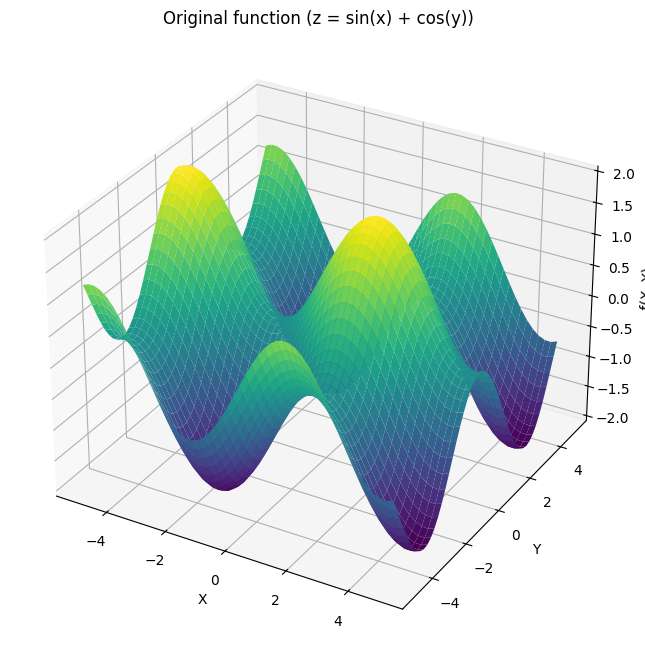

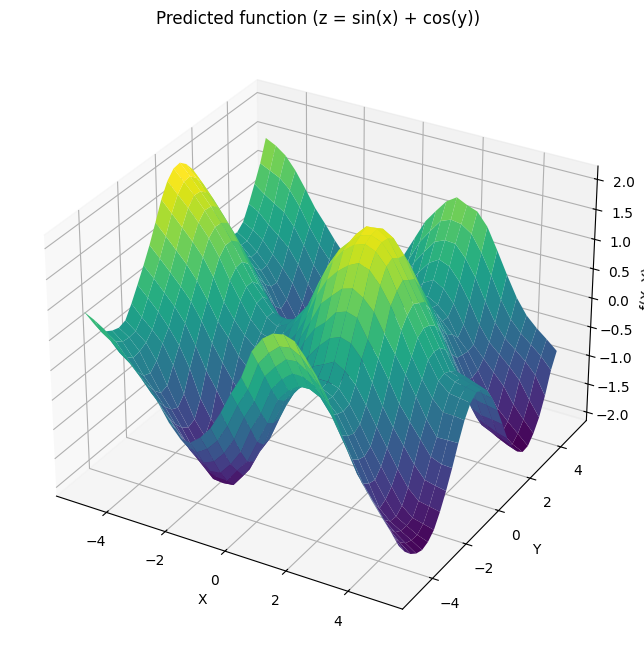

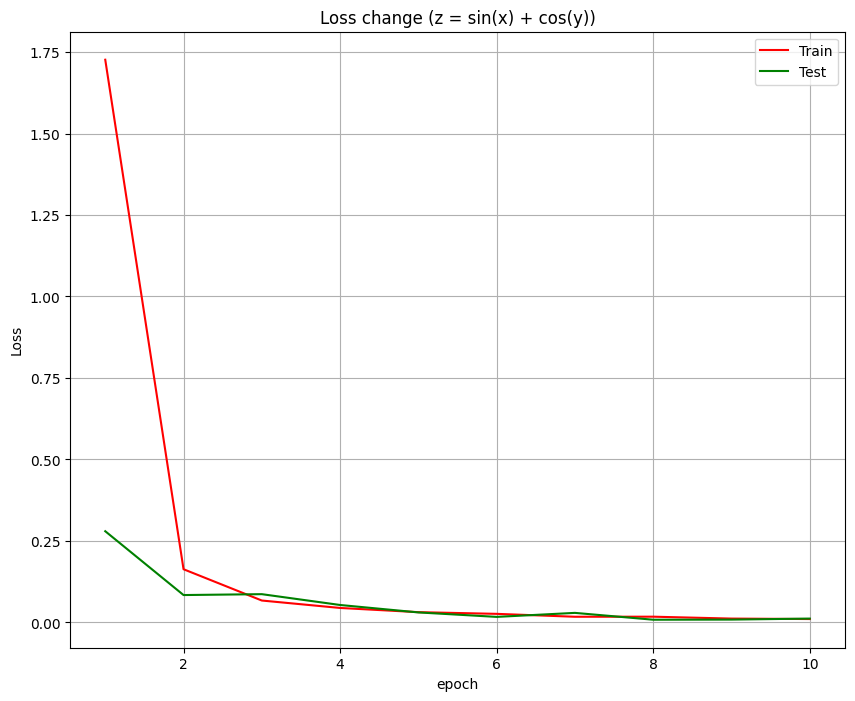

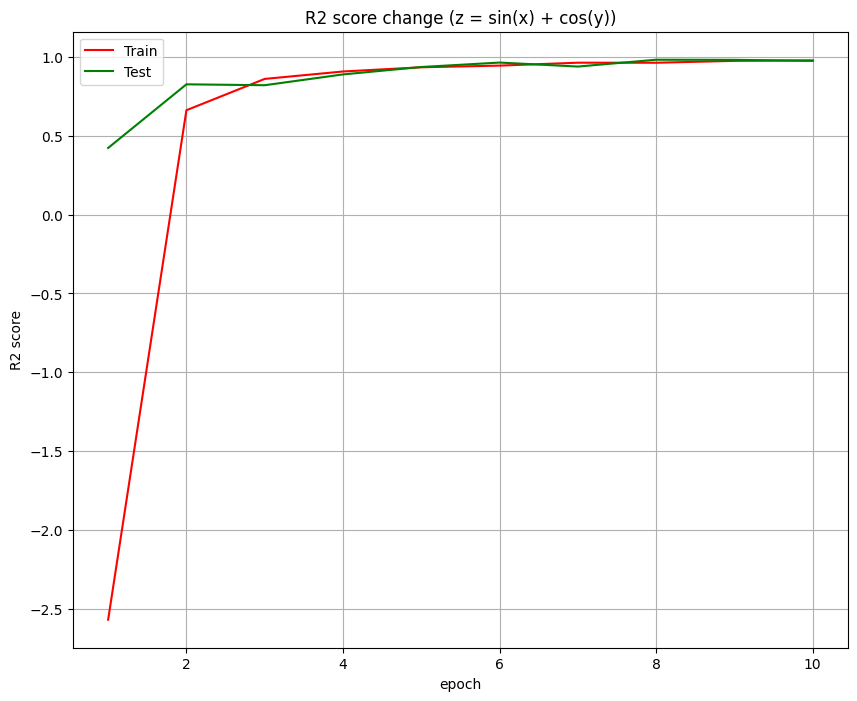

In [16]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = sin(x) + cos(y))'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = sin(x) + cos(y))'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = sin(x) + cos(y))')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = sin(x) + cos(y))')